<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [554]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [555]:
tr_mcc_codes = pd.read_csv('../data/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('../data/tr_types.csv', sep=';')
transactions = pd.read_csv('../data/transactions.csv', sep=',', nrows=1000000)
gender_train = pd.read_csv('../data/gender_train.csv', sep=',')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [556]:
df = pd.merge(transactions,gender_train, how="left")
df = pd.merge(df, tr_mcc_codes, how="inner")
df = pd.merge(df, tr_types, how='inner')
df.head()
print(df.shape)

(999584, 9)


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [557]:
grp = df[df.amount < 0].groupby(by="gender").mean()
abs(-53376.917122 - -86094.972042)
#ответ 32718.05

32718.054919999995

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [558]:
grp = df
grp['mcc_code+tr_type'] = grp.mcc_code.map(str) + grp.tr_type.map(str)
grp = grp[['mcc_code+tr_type', 'amount']][grp.amount < 0]

fltr = lambda group_df: len(group_df['amount']) >= 10

amount = (grp.groupby('mcc_code+tr_type').filter(fltr) 
            .groupby('mcc_code+tr_type').var()).amount  
np.rint( amount.max() / amount.min()).astype(int)
# 9170599

9170599

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [559]:
grp = df
grp = grp[grp.amount > 0]
grp = grp[grp.gender == 0].groupby(by=['tr_type'])['amount'].max().sort_values()
grp

tr_type
4051        1122.96
4110        2245.92
4210        2245.92
2370        2335.75
4100        5041.86
7075        6737.75
2110       22459.16
1010       24839.83
2010       44918.32
2210       68315.82
1210       83644.87
2331      112295.79
6210      174058.47
7040      224591.58
7035      276247.64
8145      320145.86
6010      329857.65
6100      369848.43
1110      393035.26
7024      449183.15
7015      482871.89
1200      575551.85
6200      753576.16
6000     1498385.17
6110     1909028.41
1100     2097006.17
7034     2245915.77
7014     2695098.93
7041     3368873.66
7011     4604127.33
7030     5614789.43
7031     6513155.74
7074     6737747.32
7010     8983663.09
7071    11229578.86
7021    13677627.05
7020    22459157.72
7070    67377473.16
Name: amount, dtype: float64

gender == 1: 4110 2020 1010 8100 6000

gender == 0: 4051 4110 4210 2370 4100

In [560]:
max = list([4110, 2020, 1010, 8100, 6000, 4051, 4110, 4210, 2370, 4100])
max
tr_types.set_index('tr_type', inplace=True)
tr_types.loc[max]

,tr_description
tr_type,
4110,Плата за получение наличных в АТМ. Россия
2020,Выдача наличных через POS Сбербанка
1010,Покупка. POS ТУ СБ РФ
8100,Списание после проведения претензионной работы
6000,Возврат покупки. ТУ СБ РФ
4051,Плата за перевод на карту (с карты) через АТМ ...
4110,Плата за получение наличных в АТМ. Россия
4210,Плата за получение наличных в АТМ. Зарубеж.
2370,Списание с карты на карту по операции <перевод...


In [561]:
# ответ 5

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.



In [562]:
# 135

In [563]:
tsk = df
tsk['tr_day'] = tsk.tr_datetime.str.split().str[0]
tsk = tsk[tsk.groupby('tr_day')['mcc_code'].transform('nunique')>75]
tsk = tsk.groupby(['mcc_code','gender']).amount.median()
tsk.loc[5813]

gender
0.0    -9387.93
1.0   -13475.49
Name: amount, dtype: float64

In [564]:
tr_mcc_codes.set_index('mcc_code', inplace=True)

In [565]:
ind = [5411, 4814, 4829]
tr_mcc_codes[tr_mcc_codes['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков']

,mcc_description
mcc_code,
5813,"Бары, коктейль-бары, дискотеки, ночные клубы и..."


In [566]:
# 1 - male
# 0 - female

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [567]:
# ответ - 135
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

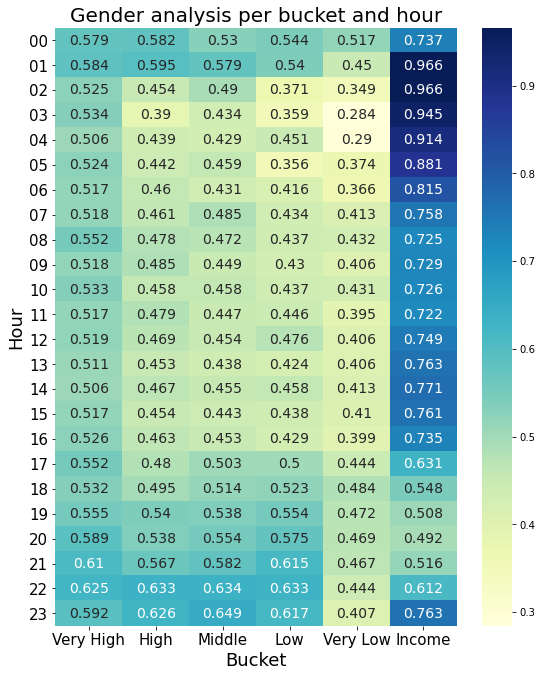

In [588]:
tsk = df
tsk['amount_bucket'], bins = pd.qcut(tsk.loc[tsk.amount < 0].amount, 
                                          5,
                                          labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'],
                                          retbins=True)
tsk.amount_bucket.cat.add_categories('Income', inplace=True)
tsk.amount_bucket.fillna('Income', inplace=True)
tsk['tr_hour'] = tsk.tr_datetime.str.split(r"\ |,|:").str[1]

wide_format = tsk.pivot_table(index='tr_hour', 
                                columns='amount_bucket', 
                                values='gender')

plot_pivot_table(wide_format)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [575]:
ind = list([4814, 4829, 5411, 6010, 6011])
tr_mcc_codes.loc[ind]

,mcc_description
mcc_code,
4814,"Звонки с использованием телефонов, считывающих..."
4829,Денежные переводы
5411,"Бакалейные магазины, супермаркеты"
6010,Финансовые институты — снятие наличности вручную
6011,Финансовые институты — снятие наличности автом...


<AxesSubplot:xlabel='tr_day'>

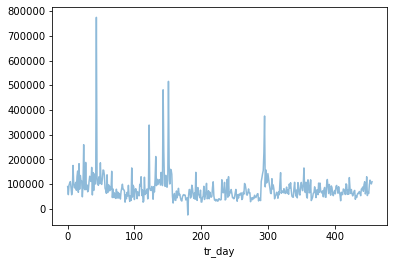

In [593]:
# ответ 134
tsk = df
tsk['tr_day'] = tsk.tr_datetime.str.split().str[0].astype(int)
# mcc = tsk.groupby(['mcc_code'])['mcc_code'].count() > 60000
tsk = tsk[tsk.groupby('mcc_code')['mcc_code'].transform('count')>60000]
grp = tsk.groupby(['tr_day','mcc_code']).amount.mean().unstack()
grp[6010].plot(alpha=0.5)